In [2]:
import seaborn as sns
import pandas as pd
# import matplotlib.pypthon as mlt

In [3]:
df = pd.read_csv('dds_datasets/dds_ch2_nyt/nyt1.csv')
df

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [7]:
bins = [0, 18, 25, 35, 45, 55, 65, 110]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group']=pd.cut(df.Age,bins,labels=labels,include_lowest=True)
df


,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458436,0,0,2,0,0,<18
458437,0,0,4,0,0,<18
458438,72,1,5,0,1,65+
458439,0,0,5,0,0,<18


In [8]:
df.columns = [col.lower() for col in df.columns]

In [10]:
df

,age,gender,impressions,clicks,signed_in,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458436,0,0,2,0,0,<18
458437,0,0,4,0,0,<18
458438,72,1,5,0,1,65+
458439,0,0,5,0,0,<18


<Axes: xlabel='age_group', ylabel='count'>

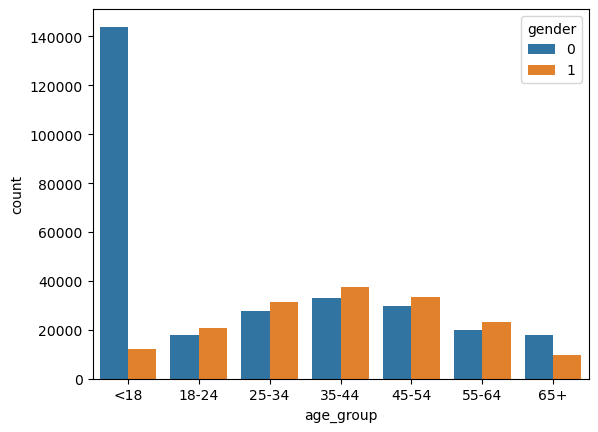

In [14]:
sns.countplot(x='age_group',hue='gender',data = df)

<Axes: xlabel='clicks', ylabel='count'>

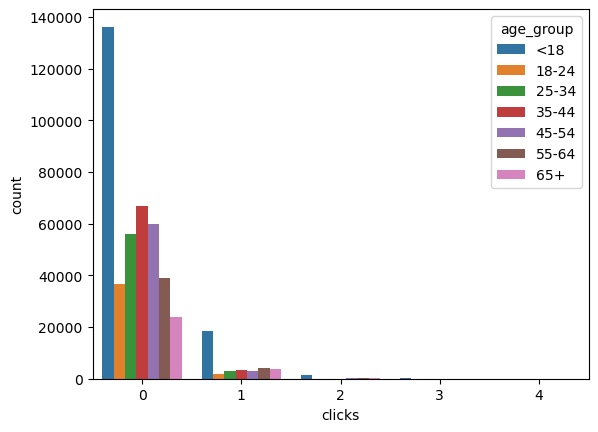

In [15]:
sns.countplot(x='clicks',hue='age_group',data = df)

<Axes: xlabel='impressions', ylabel='Count'>

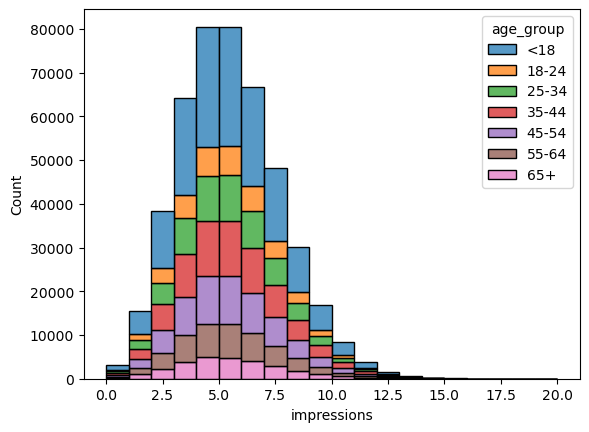

In [23]:
sns.histplot(x='impressions',hue='age_group',stat='count',binwidth=1,data = df,multiple='stack')

<Axes: xlabel='age_group', ylabel='impressions'>

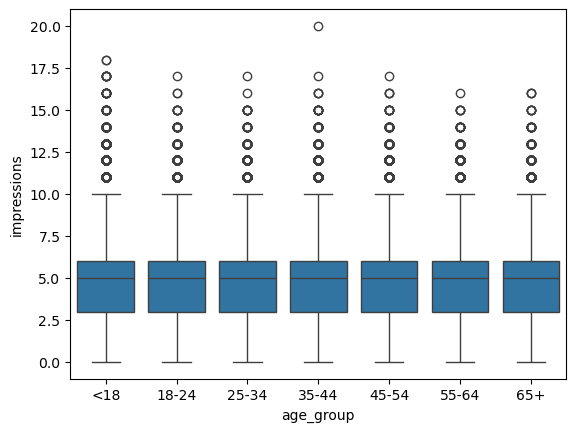

In [26]:
sns.boxplot(y='impressions',x='age_group',data = df)

<Axes: xlabel='age_group', ylabel='impressions'>

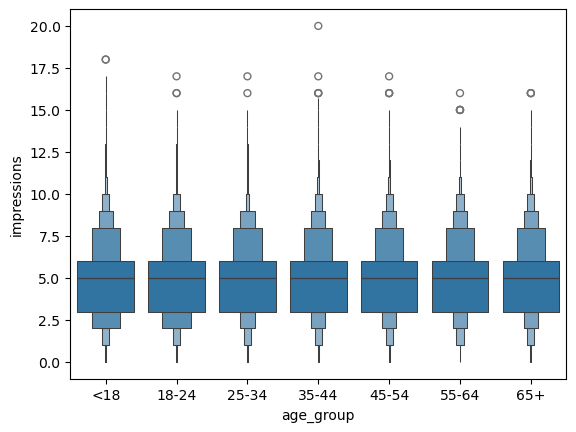

In [28]:
sns.boxenplot(y='impressions',x='age_group',data = df)

In [32]:
df['CTP']= round(df['clicks']/df['impressions'],5)
df

,age,gender,impressions,clicks,signed_in,age_group,CTP
0,36,0,3,0,1,35-44,0.0
1,73,1,3,0,1,65+,0.0
2,30,0,3,0,1,25-34,0.0
3,49,1,3,0,1,45-54,0.0
4,47,1,11,0,1,45-54,0.0
...,...,...,...,...,...,...,...
458436,0,0,2,0,0,<18,0.0
458437,0,0,4,0,0,<18,0.0
458438,72,1,5,0,1,65+,0.0
458439,0,0,5,0,0,<18,0.0


<Axes: xlabel='CTP', ylabel='age_group'>

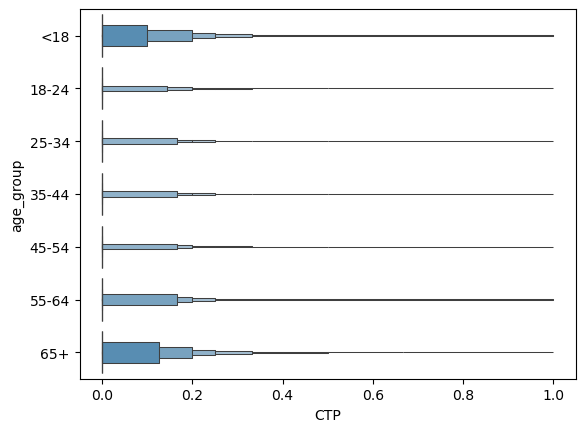

In [35]:
sns.boxenplot(y=df['age_group'],x= df['CTP'])

In [47]:
bins = [-1, 0, 0.1, 0.2, 0.4, 1]
labels = ['0', '<10%', '10%-20%', '20%-40%', '>40%']
df['CTP_group']= pd.cut(df.CTP,bins,labels=labels,include_lowest=True)
df.CTP_group.value_counts(normalize=True,sort=True)

CTP_group
0          0.912516
10%-20%    0.054654
20%-40%    0.023328
<10%       0.004996
>40%       0.004506
Name: proportion, dtype: float64

In [51]:
df_clicked= df[df['clicks']>0]
df_clicked

,age,gender,impressions,clicks,signed_in,age_group,CTP,CTP_group
5,47,0,11,1,1,45-54,0.09091,<10%
6,0,0,7,1,0,<18,0.14286,10%-20%
10,0,0,8,1,0,<18,0.12500,10%-20%
39,0,0,7,2,0,<18,0.28571,20%-40%
63,0,0,2,1,0,<18,0.50000,>40%
...,...,...,...,...,...,...,...,...
458390,19,0,5,1,1,18-24,0.20000,10%-20%
458392,47,0,5,1,1,45-54,0.20000,10%-20%
458402,0,0,5,1,0,<18,0.20000,10%-20%
458407,0,0,4,1,0,<18,0.25000,20%-40%


<Axes: xlabel='age_group', ylabel='CTP'>

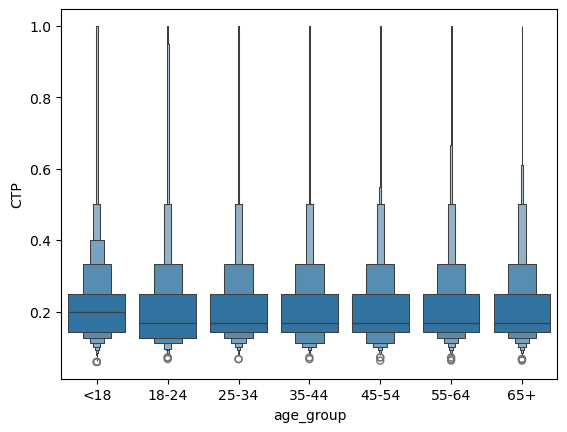

In [52]:
sns.boxenplot(x=df_clicked['age_group'],y= df_clicked['CTP'])